# Rays Intersecting with 2D boxes
Having now been introduced to ray tracing, we will explore more complex objects. Up to now, we have considered objects which are entirely described by one single mathematical equation. These tend to be relatively simple shapes. More complex shapes can be constructed using multiple sets of these simple shapes. The downside to this is that we have to check for intersections with many different components of a single object. The simplest example of these is a 2D box.

In [1]:
## Libraries
%matplotlib inline
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import Axes3D, proj3d

We will make use of the example shown in lectures which contains several different rays which share a common origin. In particular, we want to illustrate what this configuration looks like, something not really covered in the lectures:

## Lecture Example 1
**Determine if the box with vertices $A(3,2)$, $B(9,2)$, $C(9,5)$ and $D(3,5)$ is intersected by the ray originating from $(5,8)$ and** 


1.   **ending at $(12,1)$.**
2.   **ending at $(13,4)$.**
3.   **is in the direction of $-\vec{i}-2\vec{j}$.**

**If so determine the coordinates of the first intersection point.**



---

Let us first construct the equations describing the box components:

In [1]:
u = sym.Symbol('u', positive=True)
A = sym.Matrix([[3, 2]])
B = sym.Matrix([[9, 2]])
C = sym.Matrix([[9, 5]])
D = sym.Matrix([[3, 5]])
AB = A + u * (B-A)
CD = C + u * (D-C)
BC = B + u * (C-B)
AD = A + u * (D-A)

NameError: name 'sym' is not defined

Lets also set up the rays for parts (1-3):

In [ ]:
t = sym.Symbol('t', positive=True)
r_o = sym.Matrix([[5, 8]])
r1_e = sym.Matrix([[12, 1]])
r2_e = sym.Matrix([[13, 4]])
r3_v = sym.Matrix([[-1, -2]])
r1 = r_o + t * (r1_e-r_o)
r2 = r_o + t * (r2_e-r_o)
r3 = r_o + t * r3_v

Now we need to equate each ray with each part of the box:

### Part 1 (ray 1):
We need to solve four sets of simultaneous equations, just as we did in lectures (only this time Python takes care of this for us in one line per set of simultaneous equations!):

In [ ]:
s1AB = sym.solve(r1-AB,(u,t))
s1CD = sym.solve(r1-CD,(u,t))
s1BC = sym.solve(r1-BC,(u,t))
s1AD = sym.solve(r1-AD,(u,t))
allsols = [s1AB, s1CD, s1BC, s1AD]
print(allsols)

[{u: 4/3, t: 6/7}, {u: 1/6, t: 3/7}, {u: 2/3, t: 4/7}, []]


Python has found 3 sets of solutions. 

You can see that the first in the list returns $u=4/3$. Since each line segment for the box relies on specific parameter ranges, $0 < u < 1$, we can reject this solution. (For completeness, a solution like this means that if the side of the box, in this case AB, were *extended*, it would then likely intersect the ray).

We can now convert the symbolic expressions into numbers, and substitute these back into our ray equation to find locations of intersection (labelled with entry or exit depending on size of $t$):

In [ ]:
CDt = list(s1CD.values())[1].evalf()
CDi = r1.subs(t,list(s1CD.values())[1].evalf())
CDia = np.array(CDi.tolist()[0],dtype='float64')
BCt = list(s1BC.values())[1].evalf()
BCi = r1.subs(t,list(s1BC.values())[1].evalf())
BCia = np.array(BCi.tolist()[0],dtype='float64')
if CDt < BCt:
  CDstr = "[ENTRY]"
  BCstr = "[EXIT]"
else:
  CDstr = "[EXIT]"
  BCstr = "[ENTRY]"
print("CD intersection at ({:0.3f},{:0.3f}) {}".format(CDia[0], CDia[1], CDstr))
print("BC intersection at ({:0.3f},{:0.3f}) {}".format(BCia[0], BCia[1], BCstr))

CD intersection at (8.000,5.000) [ENTRY]
BC intersection at (9.000,4.000) [EXIT]


We should check this result visually with a plot:

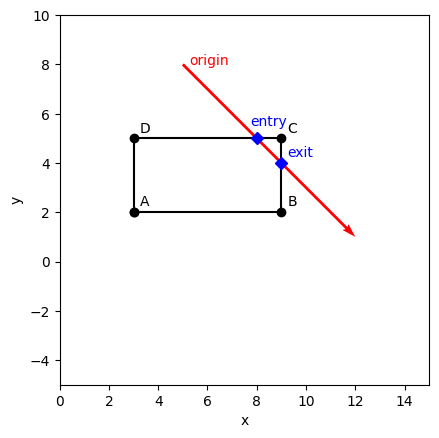

In [ ]:
x_vals = np.array([A[0], B[0], C[0], D[0]])
y_vals = np.array([A[1], B[1], C[1], D[1]])
p = np.array([x_vals, y_vals])
lx=np.append(x_vals,x_vals[0]) #array of vertices to draw (appended so closing box)
ly=np.append(y_vals,y_vals[0])
plt.plot(lx, ly, 'ko', linestyle="-")
plt.text(A[0]+0.25,A[1]+0.25,"A")
plt.text(B[0]+0.25,B[1]+0.25,"B")
plt.text(C[0]+0.25,C[1]+0.25,"C")
plt.text(D[0]+0.25,D[1]+0.25,"D")
ro = np.array(r_o.tolist()[0],dtype='float64') #convert ray origin to numpy array
r1e = np.array(r1_e.tolist()[0],dtype='float64') #convert ray end to numpy array
plt.quiver(ro[0], ro[1], r1e[0]-ro[0], r1e[1]-ro[1], angles="xy", scale_units="xy", scale = 1, color="Red")
plt.text(r_o[0]+0.25,r_o[1],"origin", color='r')
plt.plot(CDia[0], CDia[1], 'bD')
plt.text(CDia[0]-0.25,CD[1]+0.5,"entry", color='b')
plt.plot(BCia[0], BCia[1], 'bD')
plt.text(BCia[0]+0.25,BCia[1]+0.25,"exit", color='b')
plt.ylim([-5,10])
plt.xlim([0,15])
plt.ylabel('y')
plt.xlabel('x')
plt.gca().set_aspect('equal')
plt.show()

This does appear to agree with our solutions from the lectures: an entry into the box at $(8,5)$ $\left(t=\frac{3}{7}\right)$, and exiting the box at $(9,4)$ $\left(t=\frac{4}{7}\right)$.

### Part 2 (ray 2)
Part 2 follows a similar procedure to Part 1:

In [ ]:
s2AB = sym.solve(r2-AB,(u,t))
s2CD = sym.solve(r2-CD,(u,t))
s2BC = sym.solve(r2-BC,(u,t))
s2AD = sym.solve(r2-AD,(u,t))
allsols2 = [s2AB, s2CD, s2BC, s2AD]
print(allsols2)

[{u: 7/3, t: 3/2}, [], {u: 4/3, t: 1/2}, []]


You can immediately see from the above solutions that this ray is not expected to intersect the box: only two solutions are returned, but both values of $u$ are outside the acceptable range $0\le u\le 1$. A plot should confirm this:

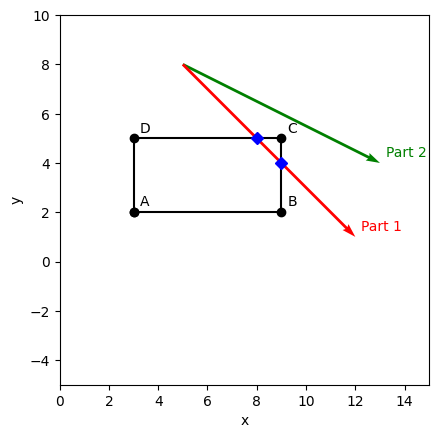

In [ ]:
plt.plot(lx, ly, 'ko', linestyle="-")
plt.text(A[0]+0.25,A[1]+0.25,"A")
plt.text(B[0]+0.25,B[1]+0.25,"B")
plt.text(C[0]+0.25,C[1]+0.25,"C")
plt.text(D[0]+0.25,D[1]+0.25,"D")
r2e = np.array(r2_e.tolist()[0],dtype='float64') #convert ray end to numpy array
plt.quiver(ro[0], ro[1], r2e[0]-ro[0], r2e[1]-ro[1], angles="xy", scale_units="xy", scale = 1, color="g")
plt.text(r1e[0]+0.25,r1e[1]+0.25,"Part 1", color='r')
plt.quiver(ro[0], ro[1], r1e[0]-ro[0], r1e[1]-ro[1], angles="xy", scale_units="xy", scale = 1, color="Red")
plt.text(r2e[0]+0.25,r2e[1]+0.25,"Part 2", color='g')
plt.plot(CDia[0], CDia[1], 'bD')
plt.plot(BCia[0], BCia[1], 'bD')
plt.ylim([-5,10])
plt.xlim([0,15])
plt.ylabel('y')
plt.xlabel('x')
plt.gca().set_aspect('equal')
plt.show()

### Part 3:

In [ ]:
s3AB = sym.solve(r3-AB,(u,t))
s3CD = sym.solve(r3-CD,(u,t))
s3BC = sym.solve(r3-BC,(u,t))
s3AD = sym.solve(r3-AD,(u,t))
allsols = [s3AB, s3CD, s3BC, s3AD]
print(allsols)

[[], {u: 11/12, t: 3/2}, [], {u: 2/3, t: 2}]


In the case of this final ray, we can see that the values of $u$ and $t$ returned lie in the correct ranges. Let us see what intercept values this returns and whether the values of $t$ correspond to entry or exit points:

In [ ]:
CDt3 = list(s3CD.values())[1].evalf()
CDi3 = r3.subs(t,list(s3CD.values())[1].evalf())
CDia3 = np.array(CDi3.tolist()[0],dtype='float64')
ADt3 = list(s3AD.values())[1].evalf()
ADi3 = r3.subs(t,list(s3AD.values())[1].evalf())
ADia3 = np.array(ADi3.tolist()[0],dtype='float64')
if CDt3 < ADt3:
  CD3str = "[ENTRY]"
  AD3str = "[EXIT]"
else:
  CD3str = "[EXIT]"
  AD3str = "[ENTRY]"
print("CD intersection at ({:0.3f},{:0.3f}) {}".format(CDia3[0], CDia3[1], CD3str))
print("AD intersection at ({:0.3f},{:0.3f}) {}".format(ADia3[0], ADia3[1], AD3str))

CD intersection at (3.500,5.000) [ENTRY]
AD intersection at (3.000,4.000) [EXIT]


So we have an entry location in the same side of the rectangle as Part 1 (in CD), but the ray exits the rectangle via the face AD.

Finally lets check what this all looks like visually to confirm our findings make sense:

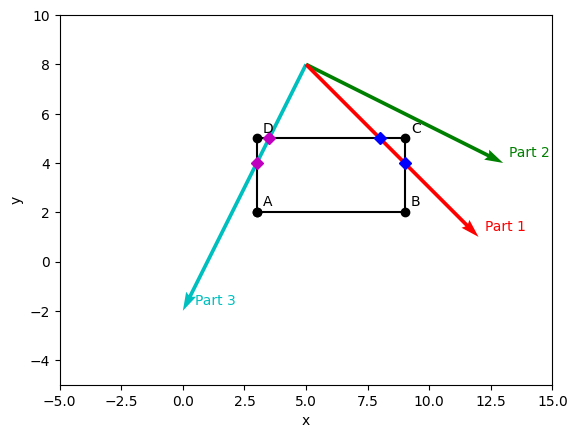

In [ ]:
plt.plot(lx, ly, 'ko', linestyle="-")
plt.text(A[0]+0.25,A[1]+0.25,"A")
plt.text(B[0]+0.25,B[1]+0.25,"B")
plt.text(C[0]+0.25,C[1]+0.25,"C")
plt.text(D[0]+0.25,D[1]+0.25,"D")
r3e = r3.subs(t,5)
r3e = np.array(r3e.tolist()[0],dtype='float64') #convert ray end to numpy array
plt.quiver(ro[0], ro[1], r3e[0]-ro[0], r3e[1]-ro[1], angles="xy", scale_units="xy", scale = 1, color="c")
plt.text(r3e[0]+0.5,r3e[1]+0.25,"Part 3", color='c')
plt.quiver(ro[0], ro[1], r2e[0]-ro[0], r2e[1]-ro[1], angles="xy", scale_units="xy", scale = 1, color="g")
plt.text(r1e[0]+0.25,r1e[1]+0.25,"Part 1", color='r')
plt.quiver(ro[0], ro[1], r1e[0]-ro[0], r1e[1]-ro[1], angles="xy", scale_units="xy", scale = 1, color="Red")
plt.text(r2e[0]+0.25,r2e[1]+0.25,"Part 2", color='g')
plt.plot(CDia[0], CDia[1], 'bD')
plt.plot(BCia[0], BCia[1], 'bD')
plt.plot(CDia3[0], CDia3[1], 'mD')
plt.plot(ADia3[0], ADia3[1], 'mD')
plt.ylim([-5,10])
plt.xlim([-5,15])
plt.ylabel('y')
plt.xlabel('x')
plt.gca().set_aspect('equal')
plt.show()

As expected, the image of the three parts of this question confirms our solutions. The intercept locations align with the different parts of the box and the rays that pass through them, while the ray which does not intersect the box yields no viable intersection locations.

## Over to you
Try some more examples from the lectures or the tutorial questions once you are satisfied with the mathematics